In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'/home/miguel/MEGA/FCUP/2020-2021/1stSemester/Introdução à ciência de dados/Project/df_final.csv')

In [3]:
X = df.drop(columns = 'NORMAL X ANORMAL')
X.drop(columns = 'IMC', inplace=True)
y = df.loc[:,'NORMAL X ANORMAL']

In [4]:
X = pd.get_dummies(X)

# Univariate Selection

In [5]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                                                Specs        Score
12                                     SOPRO_presente  6510.566397
1                                              Altura  3989.784083
0                                                Peso  3890.028064
11                                      SOPRO_ausente  3465.194741
5                                                  FC  1495.205495
36     MOTIVO_6 - Suspeita de cardiopatia (6 - Sopro)  1270.452271
2                                               IDADE  1211.836795
25  MOTIVO_1 - Cardiopatia já estabelecida (1 - Ca...   443.166908
29     MOTIVO_5 - Parecer cardiológico (5 - Cirurgia)   349.342943
7                                    B2_Hiperfonética   295.356055
6                                      B2_Desdob fixo   169.232097
27                    MOTIVO_5 - Parecer cardiológico   168.788934
10                                           B2_Única    83.366480
26                                MOTIVO_2 - Check-up    66.33

# Feature Importance

[4.40750142e-02 4.31239566e-02 4.58320903e-02 2.14369015e-02
 1.65822178e-02 3.83818562e-02 3.05116110e-03 7.84202113e-03
 1.62321418e-02 1.32116787e-03 7.90911754e-04 3.33718563e-01
 3.30854749e-01 5.05253158e-03 7.45927471e-04 8.69448412e-04
 1.75061127e-03 1.79695952e-03 2.21130124e-03 1.40303779e-03
 1.54214561e-03 4.58935354e-03 3.71508346e-03 3.79145310e-03
 1.77480859e-03 8.91238752e-03 1.96254658e-03 4.54550719e-03
 1.37252523e-03 1.07308531e-02 1.55423205e-03 3.09537191e-04
 1.28892403e-03 8.87362325e-04 9.10198582e-04 1.77353817e-03
 3.15786876e-02 1.68828739e-03]


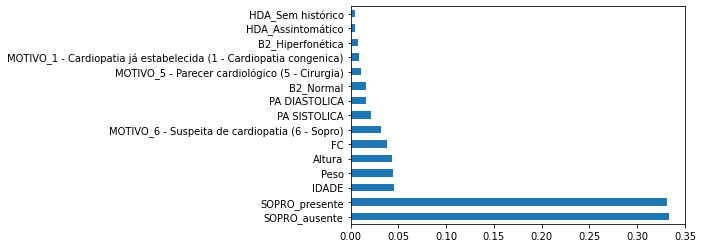

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap (all variables)

In [7]:
dfa = df
dfa = pd.get_dummies(dfa)

In [8]:
corrmat = dfa.corr()
top_corr_features = corrmat.index

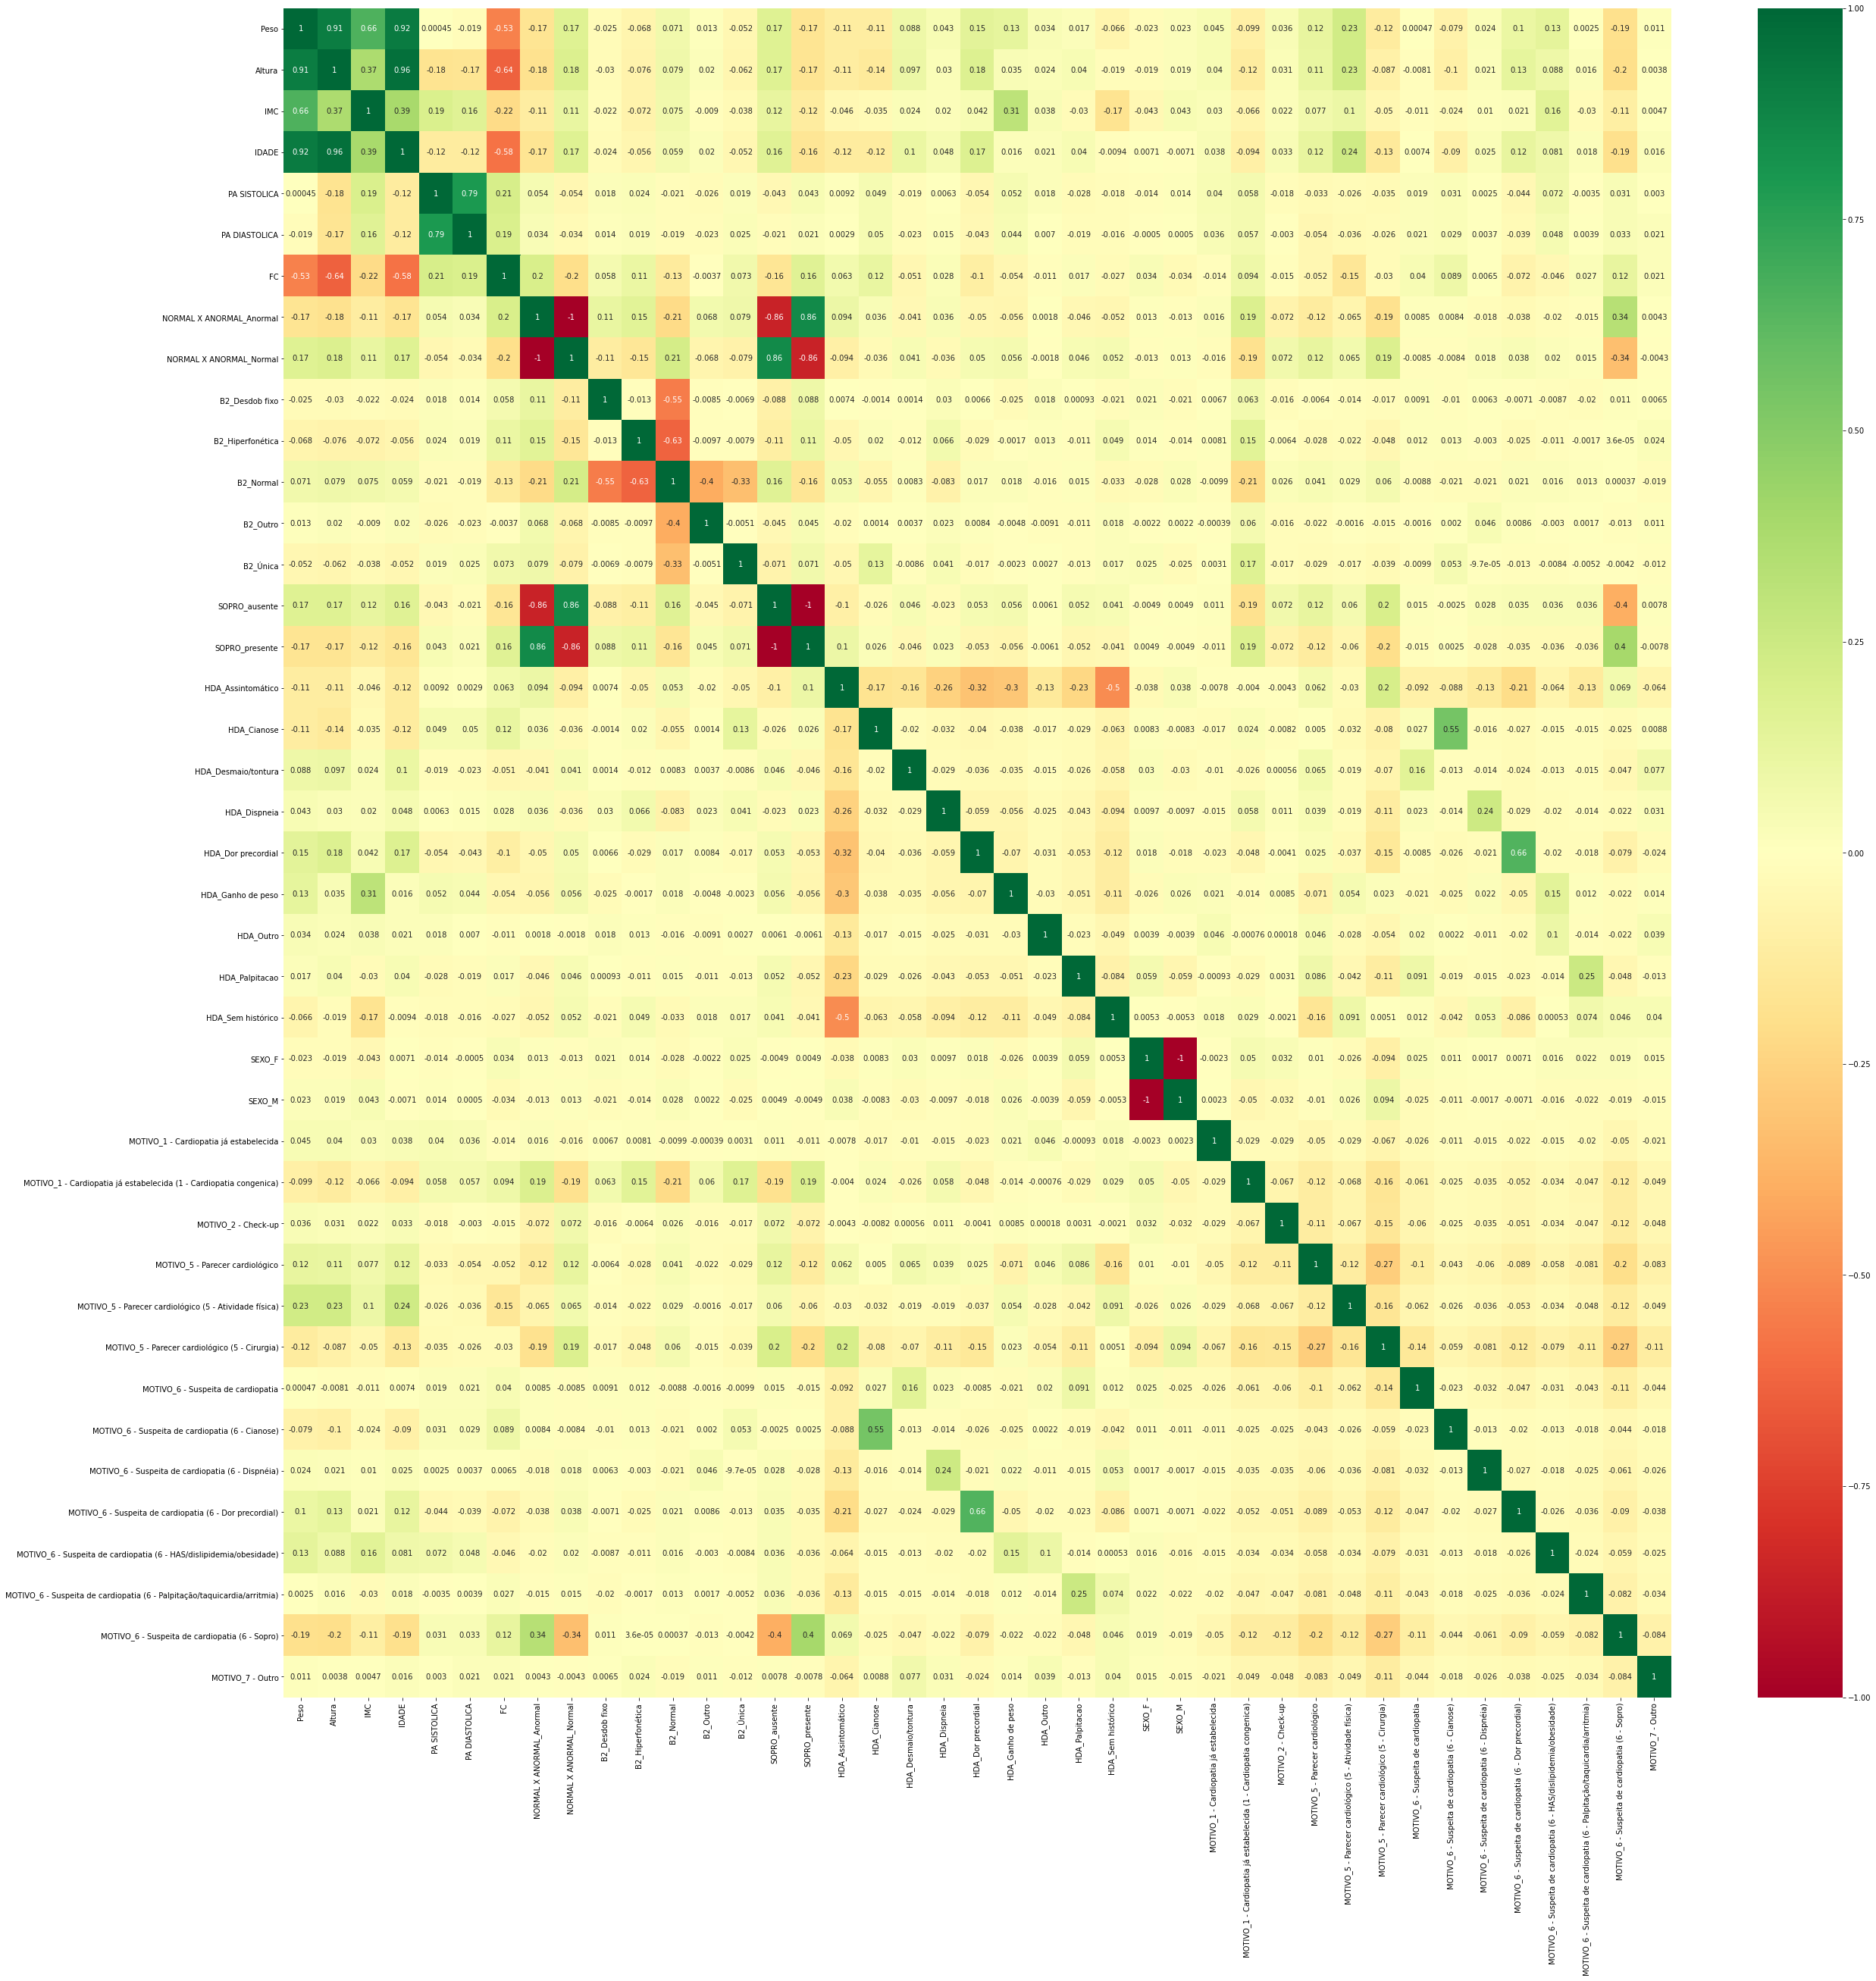

In [9]:
plt.figure(figsize=(41,41))
#plot heat map
g=sns.heatmap(dfa[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Correlation Matrix with Heatmap (after feature selection)

In [10]:
dfb = df

In [11]:
dfb.drop(columns = 'HDA', inplace=True)

In [12]:
dfb.drop(columns = 'B2', inplace=True)

In [13]:
dfb.drop(columns = 'IMC', inplace=True)

In [14]:
dfb.drop(columns = 'SEXO', inplace = True)

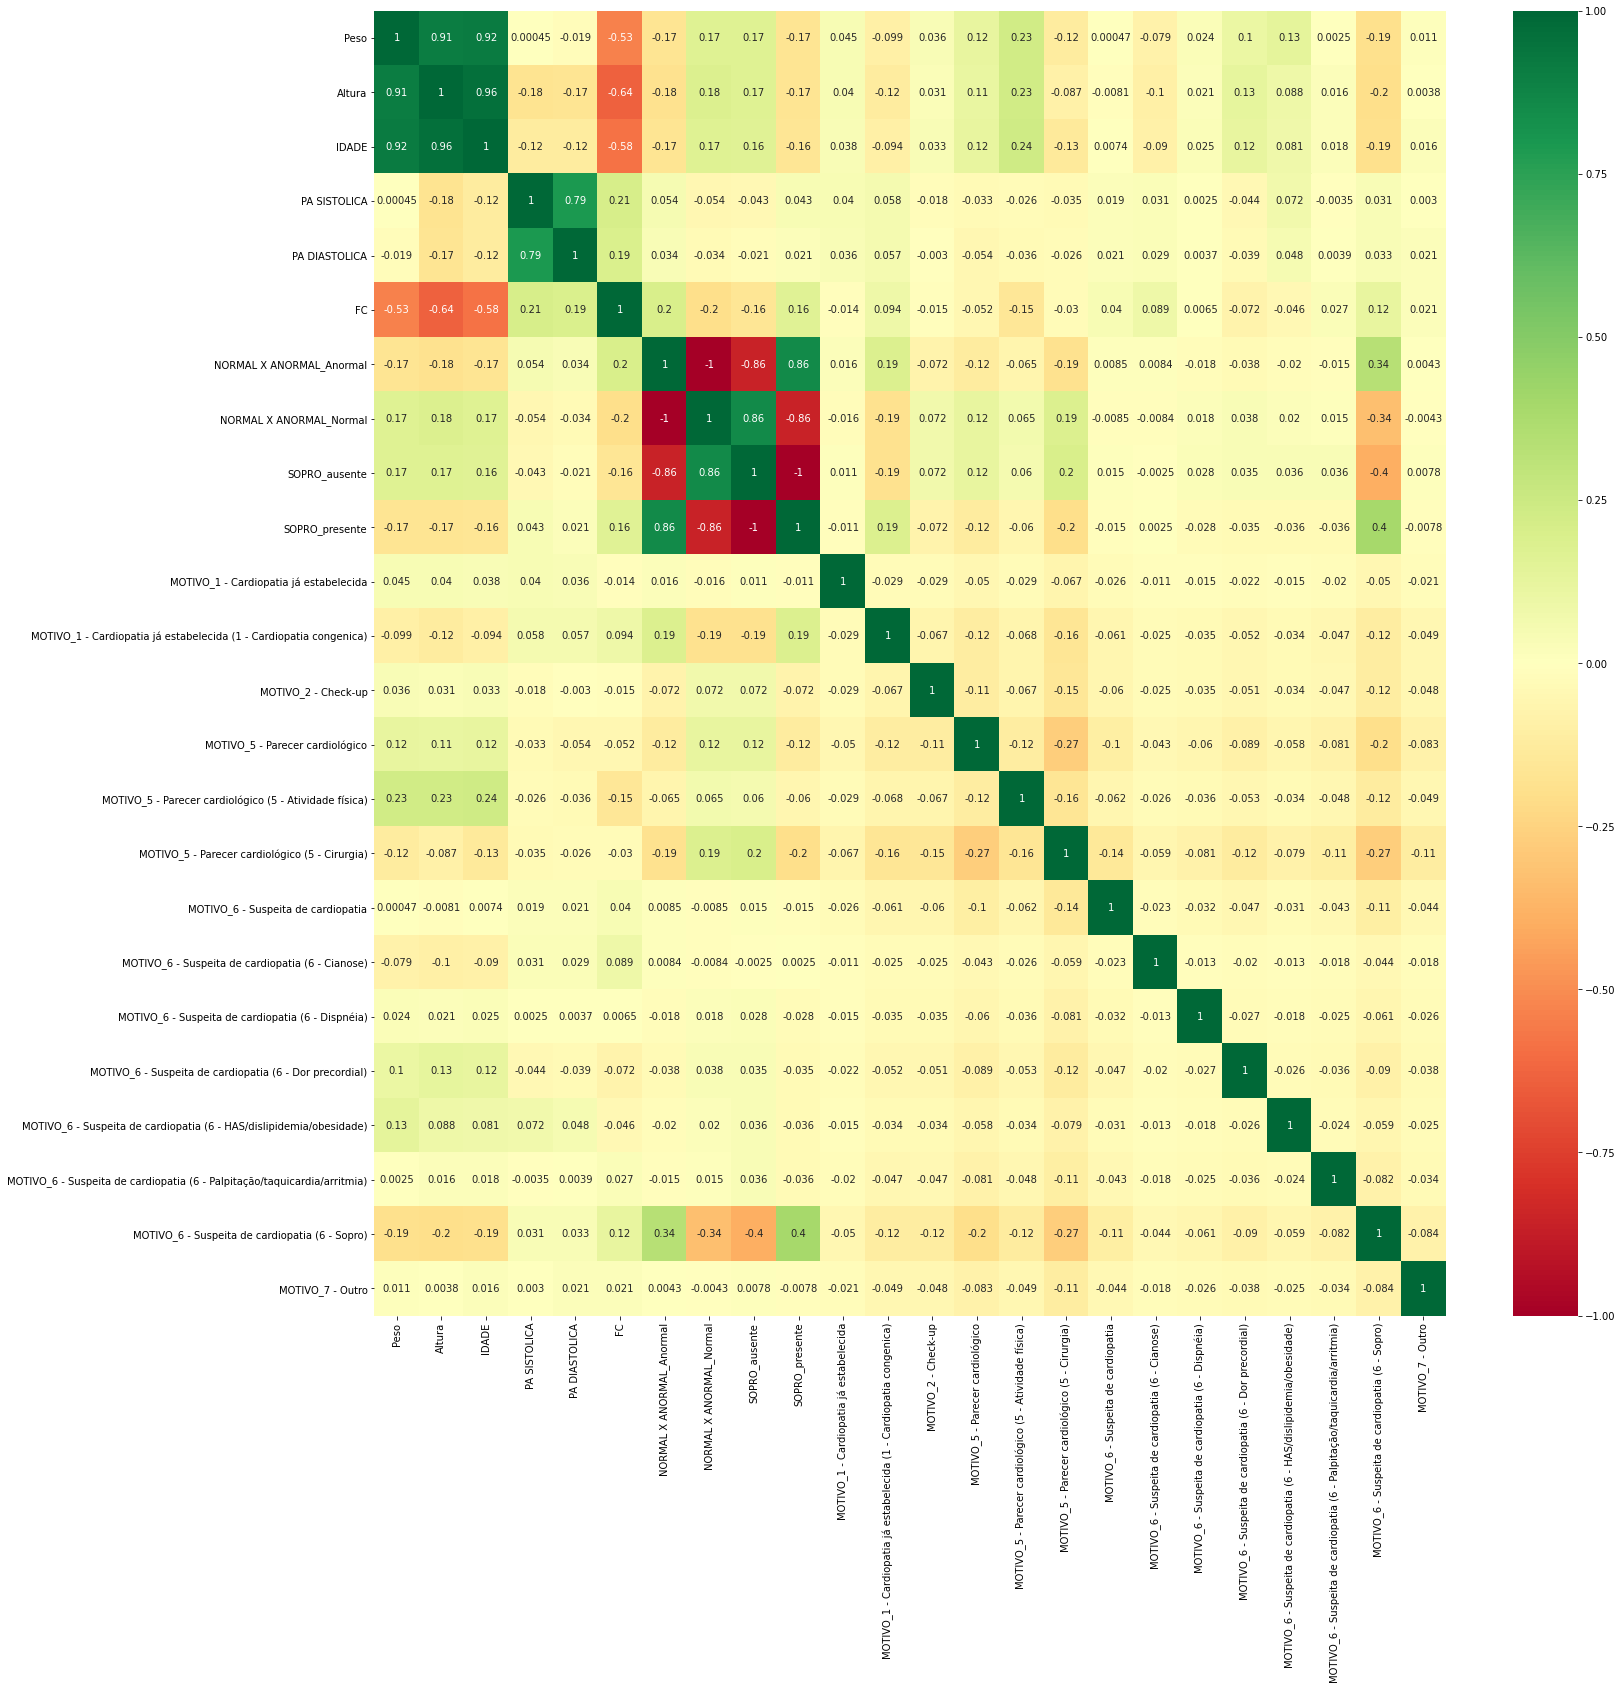

In [15]:
dfb = pd.get_dummies(dfb)
corrmat = dfb.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(24,24))
#plot heat map
g=sns.heatmap(dfb[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
df.to_csv('/home/miguel/MEGA/FCUP/2020-2021/1stSemester/Introdução à ciência de dados/Project/df_final_FS.csv', index=False)